In [1]:
import sys
import numpy as np
if '..//..//' not in sys.path:
    sys.path.append('..//../')

from opmsim.optical_system import OpticalSystem
# from opmsim.optical_elements.sine_lens import SineLens
from opmsim.optical_elements import SineLens, WavePlate, Element, LinearPolariser, FlatMirror
from opmsim.dipole_source import DipoleSource


c:\Users\Leo\python\OPMsim\notebooks\Refactor notebooks\..//..\opmsim\rays.py:72: RuntimeWarning: invalid value encountered in scalar divide
  self.ray_density = self.n / np.sum(area_elements)  # so values dont change with ray number


alpha [0.]
phi [0.]
[<opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A1E870A10>, <opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A20AB12E0>, <opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A20AB39E0>]
Orientations:
Lens 0: flipped=False
Lens 1: flipped=True
Lens 2: flipped=False
current coords [0 0 0]
current coords [0.    0.    0.005]
current coords [0.   0.   0.01]
cap method area sum 4.32075091510964
expected area sum 4.321261323834449


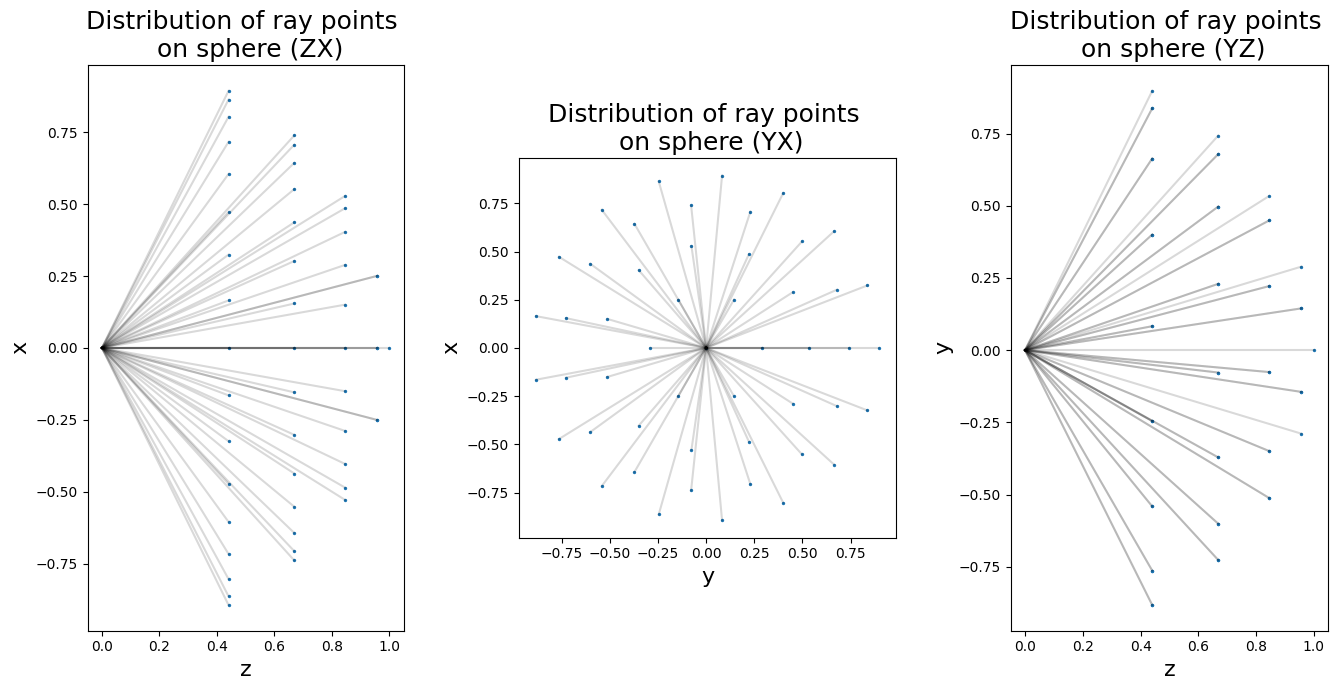

Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A1E870A10>, <opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A20AB12E0>, <opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A20AB39E0>] (3 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A1E870A10> (1/3) label: 
kvec shape (50, 3, 1)
rho shape (50,)
rho shape after (50,)
self.path_coords shape (50, 3, 1)
self.path_coords[:, :, -1] shape (50, 3)
Lens isn't flipped
Max theta: 1.1148447190879482
kvec shape (50, 3, 1)
rho shape (50,)
rho shape after (50,)
self.path_coords shape (50, 3, 2)
self.path_coords[:, :, -1] shape (50, 3)
distance shape (50,)
kvec shape (50, 3, 1)
rho shape (50,)
rho shape after (50,)
self.path_coords shape (50, 3, 3)
self.path_coords[:, :, -1] shape (50, 3)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x0000025A20AB12E0> (2/3) label: 
kvec shape (50, 3, 1)
rho shape (50,)
rho shape after (50,)
self.path_coords sha

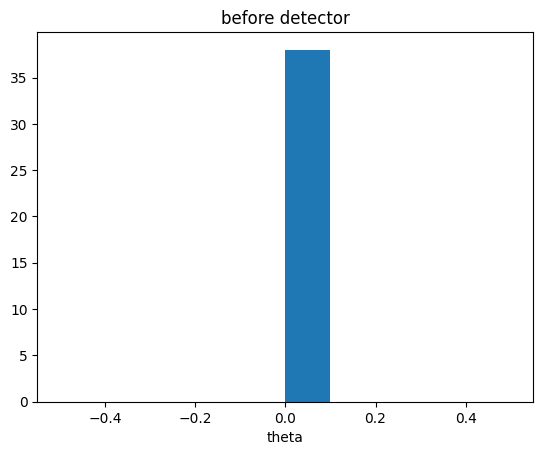

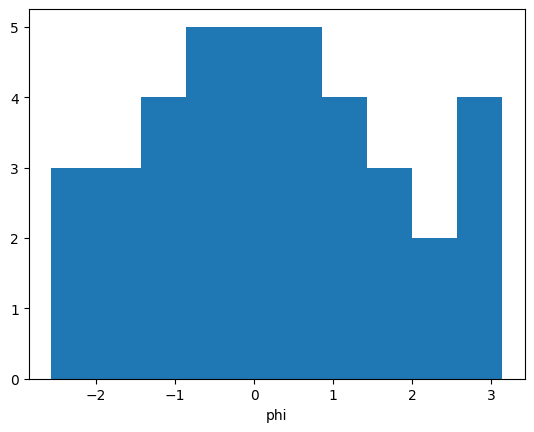

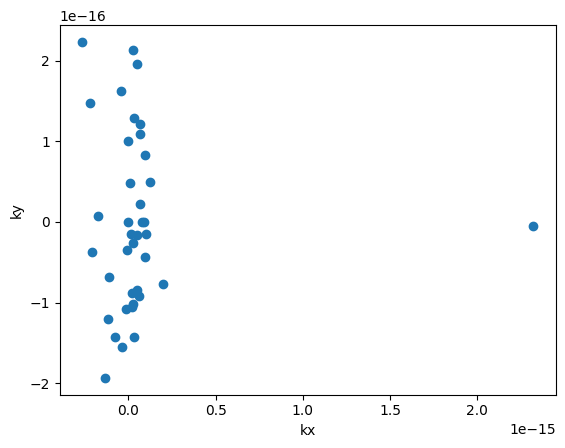

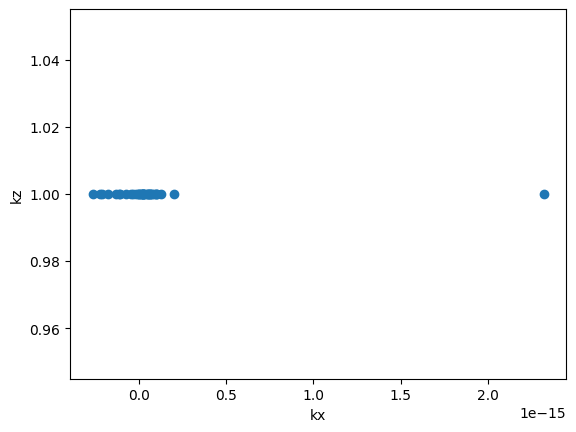

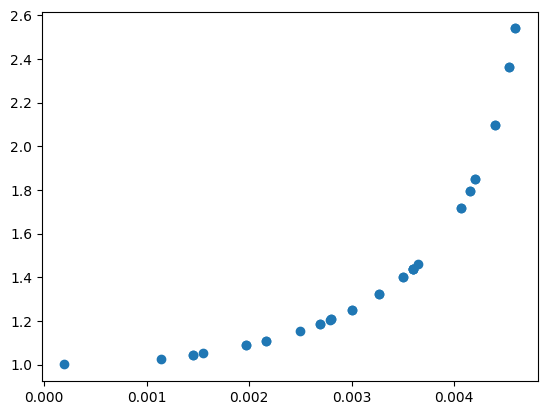

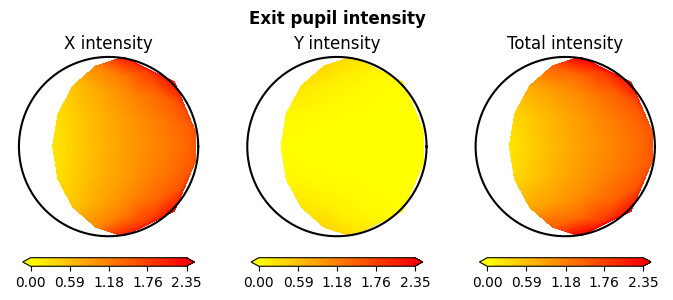

In [4]:
O1 = SineLens(0.9, 1, label="lens1")
O1_2 = SineLens(0.9, 1, label="lens2")
elements = [SineLens(0.95, 0.005), WavePlate(0, np.pi/2), SineLens(0.95, 0.005), FlatMirror(15*np.pi/180), SineLens(0.95, 0.005)] #, SineLens(0.75, 5),SineLens(0.75, 5)]
#elements = [SineLens(0.95, 0.005), SineLens(0.95, 0.005, dz=0.01),FlatMirror(15*np.pi/180), SineLens(0.95, 0.005)]

elements = [SineLens(0.95, 0.005), SineLens(0.95, 0.005), SineLens(0.95, 0.005, y_axis_rotation=30*np.pi/180)]

source = DipoleSource()
# source.add_dipoles((np.pi/2, 0))
source.add_dipoles((0,0))
print("alpha", source.alpha_d)
print("phi", source.phi_d)
# print(source.alpha_d)
# print(source.n_dipoles)
system = OpticalSystem(elements=elements, source=source)
system.ray_count = 50
# system.add_element(SineLens(1,1), 1)aa

print(system.elements)
system.trace_system()

pupil = system.pupil_plot

# source = DipoleSource()
# source.add_dipoles((np.pi/2, 0))
# # source.add_dipoles((0,0))
# print("alpha", source.alpha_d)
# print("phi", source.phi_d)
# # print(source.alpha_d)
# # print(source.n_dipoles)

# system = OpticalSystem(elements=elements, source=source)
# system.ray_count = 100

# # system.add_element(SineLens(1,1), 1)aa

# print(system.elements)
# system.trace_system()

# pupil = system.pupil_plot

[[0.         0.         0.005      0.005      0.005      0.005
  0.01       0.01       0.015      0.01558013]
 [0.         0.         0.00478612 0.005      0.005      0.00521388
  0.01       0.01       0.01478612 0.01490019]
 [0.         0.         0.00478612 0.005      0.005      0.00521388
  0.01       0.01       0.01478612 0.01521343]
 [0.         0.         0.00478612 0.005      0.005      0.00521388
  0.01       0.01       0.01478612 0.01583989]
 [0.         0.         0.00478612 0.005      0.005      0.00521388
  0.01       0.01       0.01478612 0.01615312]
 [0.         0.         0.00478612 0.005      0.005      0.00521388
  0.01       0.01       0.01478612 0.01583989]
 [0.         0.         0.00478612 0.005      0.005      0.00521388
  0.01       0.01       0.01478612 0.01521343]
 [0.         0.         0.00422775 0.005      0.005      0.00577225
  0.01       0.01       0.01422775 0.01423115]
 [0.         0.         0.00422775 0.005      0.005      0.00577225
  0.01       0.01

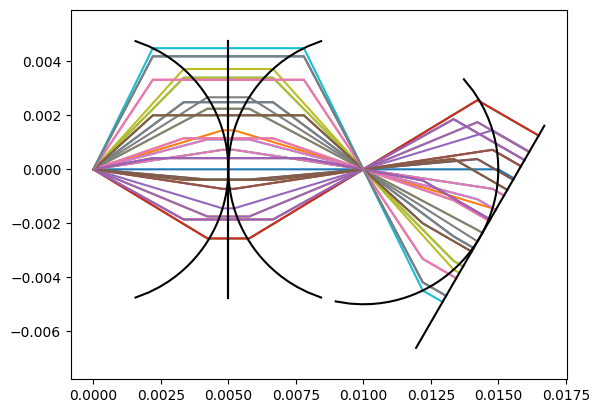

In [6]:
rays = source.rays
from matplotlib import pyplot as plt
from opmsim.visualization import draw_elements
n_from = 0
x, y, z = rays.path_coords[:,0,n_from:], rays.path_coords[:,1,n_from:], rays.path_coords[:,2,n_from:]
#x, y, z = rays.path_coords[4,0,:], rays.path_coords[4,1,:], rays.path_coords[4,2,:]

x, y, z = x.squeeze(), y.squeeze(), z.squeeze()
print(z)
print(x.shape)
rotation = 15*np.pi/180
f, ax = plt.subplots()
ax.plot(z.T, x.T, linestyle='-', marker='')
ax.axis('equal')
draw_elements.draw_sine_lens(ax, elements[0])
draw_elements.draw_sine_lens(ax, elements[1])
draw_elements.draw_sine_lens(ax, elements[2])

# draw_elements.draw_line_element(ax, elements[2], pupil_radius=0.005, rot_y=rotation)
# draw_elements.draw_sine_lens(ax, elements[3])



plt.show()

In [11]:
children = pupil.get_children()
children[0]

In [2]:
import numpy as np
a = ((0, 0), (0,1))
aa = np.array(a).reshape((-1, 2))
print(aa)
phi_d_array = np.array(aa[:,0])
alpha_d_array = np.array(aa[:,1])

print("phi", phi_d_array)
print("alpha", alpha_d_array)

len(phi_d_array)

4 > 2 * 3

[[0 0]
 [0 1]]
phi [0 0]
alpha [0 1]


False

In [6]:
sys.getsizeof(np.ones((10000, 10)))

800128

In [10]:
a = np.ones(5)
zeros = np.zeros(5)


b = np.array([[a, zeros, zeros],
     [zeros, a, zeros],
     [zeros, zeros, a]])

print(b.shape)
print(b)
b = b.swapaxes(-1, 0)
print(b)
print(b.shape)


(3, 3, 5)
[[[1. 1. 1. 1. 1.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]]
[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]
(5, 3, 3)
